### Deliverable 1: Preprocessing the Data for a Neural Network

In [108]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [109]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [110]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

<AxesSubplot:>

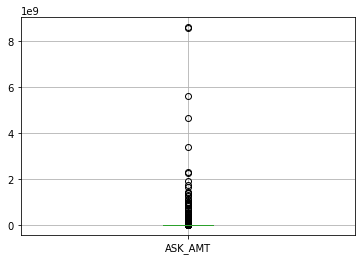

In [111]:
# Check ASK_AMT distribution
application_df.boxplot(column=['ASK_AMT'])

In [112]:
# Check ASK_AMT distribution
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [113]:
# Tried to drop outlier rows but model accuracy decreased
# application_df=application_df.loc[application_df['ASK_AMT']<8000000]

In [114]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

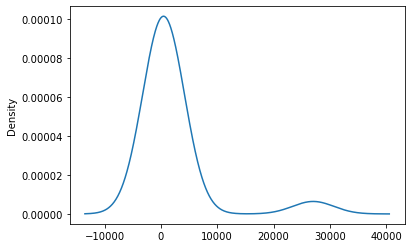

In [115]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [116]:
# Determine which values to replace if counts are less than 500
replace_app_type = list(app_type_counts[app_type_counts < 528].index)

# Replace in dataframe
for app in replace_app_type:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [117]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(15)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

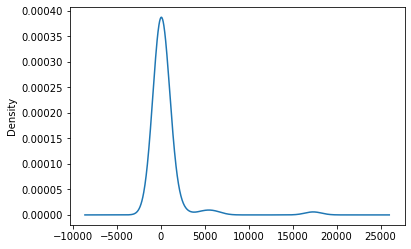

In [118]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [119]:
# Determine which values to replace if counts are less than 100
# MODIFICATION 1: increase # of CLASSIFICATION categories by lowering count cut-off for "Other" category
replace_class = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [120]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [121]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

/Users/kristindong/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/kristindong/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/kristindong/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [125]:
len(X_train_scaled[0])

49

### Deliverable 2: Compile, Train and Evaluate the Model

In [126]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# MODIFICATIONS 2: add an additional layer
# MODIFICATIONS 3: increase # neurons per layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 24)                1200      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt/",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights.{epoch:02d}.hdf5"

In [132]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=	'epoch',
    period=5
)

# Train the model
# MODIFICATION 4: increase to 200 epochs
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 6s 216us/sample - loss: 0.5330 - accuracy: 0.7421
Epoch 2/200
25724/25724 [==============================] - 3s 116us/sample - loss: 0.5324 - accuracy: 0.7409
Epoch 3/200
25724/25724 [==============================] - 4s 172us/sample - loss: 0.5328 - accuracy: 0.7411
Epoch 4/200
25724/25724 [==============================] - 4s 152us/sample - loss: 0.5329 - accuracy: 0.7414
Epoch 5/200
25664/25724 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7411
Epoch 00005: saving model to checkpoints_opt/weights.05.hdf5
25724/25724 [==============================] - 4s 150us/sample - loss: 0.5327 - accuracy: 0.7410
Epoch 6/200
25724/25724 [==============================] - 4s 163us/sample - loss: 0.5326 - accuracy: 0.7420
Epoch 7/200
25724/25724 [==============================] - 3s 127us/sample - loss: 0.5324 - accuracy: 0.7414
Epoch 8/200
25724/25724 [==============================] - 4s 14

25724/25724 [==============================] - 2s 67us/sample - loss: 0.5316 - accuracy: 0.7421
Epoch 60/200
25312/25724 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7420
Epoch 00060: saving model to checkpoints_opt/weights.60.hdf5
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5317 - accuracy: 0.7418
Epoch 61/200
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5317 - accuracy: 0.7418
Epoch 62/200
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5315 - accuracy: 0.7413
Epoch 63/200
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5312 - accuracy: 0.7417
Epoch 64/200
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5320 - accuracy: 0.7417
Epoch 65/200
25472/25724 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7415
Epoch 00065: saving model to checkpoints_opt/weights.65.hdf5
25724/25724 [==============================] -

25724/25724 [==============================] - 8s 292us/sample - loss: 0.5316 - accuracy: 0.7418
Epoch 118/200
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5310 - accuracy: 0.7416
Epoch 119/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.5315 - accuracy: 0.7422
Epoch 120/200
25536/25724 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7424
Epoch 00120: saving model to checkpoints_opt/weights.120.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5314 - accuracy: 0.7420
Epoch 121/200
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5312 - accuracy: 0.7423
Epoch 122/200
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5315 - accuracy: 0.7422
Epoch 123/200
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5310 - accuracy: 0.7418
Epoch 124/200
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5315 -

25724/25724 [==============================] - 16s 609us/sample - loss: 0.5310 - accuracy: 0.7421
Epoch 176/200
25724/25724 [==============================] - 15s 569us/sample - loss: 0.5309 - accuracy: 0.7421
Epoch 177/200
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5311 - accuracy: 0.7422
Epoch 178/200
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5304 - accuracy: 0.7423
Epoch 179/200
25724/25724 [==============================] - 4s 166us/sample - loss: 0.5314 - accuracy: 0.7420
Epoch 180/200
25696/25724 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7418
Epoch 00180: saving model to checkpoints_opt/weights.180.hdf5
25724/25724 [==============================] - 12s 455us/sample - loss: 0.5308 - accuracy: 0.7418
Epoch 181/200
25724/25724 [==============================] - 15s 578us/sample - loss: 0.5310 - accuracy: 0.7420
Epoch 182/200
25724/25724 [==============================] - 24s 942us/sample - loss

In [133]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5459 - accuracy: 0.7241
Loss: 0.5582224957657973, Accuracy: 0.7240816354751587


In [134]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")